In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp

animals = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv', encoding = 'utf-8-sig', decimal=',')
animals

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,Anvers,"Adult, 1 Egg Stage",N1A1,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.94956,-24.69454,NaN
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18,195.0,3250.0,8.36821,-25.33302,NaN
3,Anvers,"Adult, 1 Egg Stage",N2A2,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...
339,Anvers,"Adult, 1 Egg Stage",N38A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Anvers,"Adult, 1 Egg Stage",N39A1,46.8,14.3,215.0,4850.0,8.41151,-26.13832,NaN
341,Anvers,"Adult, 1 Egg Stage",N39A2,50.4,15.7,222.0,5750.0,8.30166,-26.04117,NaN
342,Anvers,"Adult, 1 Egg Stage",N43A1,45.2,14.8,212.0,5200.0,8.24246,-26.11969,NaN


In [53]:
animals = animals.drop(['Region', 'Stage', 'Individual ID', 'Comments'], axis=1)
animals

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,39.1,18.7,181.0,3750.0,NaN,NaN
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,40.3,18,195.0,3250.0,8.36821,-25.33302
3,NaN,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,8.76651,-25.32426
...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,8.41151,-26.13832
341,50.4,15.7,222.0,5750.0,8.30166,-26.04117
342,45.2,14.8,212.0,5200.0,8.24246,-26.11969


In [54]:
animals = animals.dropna(thresh=3, axis=0)
animals = animals.dropna(thresh=3, axis=1)
animals

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,39.1,18.7,181.0,3750.0,NaN,NaN
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,40.3,18,195.0,3250.0,8.36821,-25.33302
4,36.7,19.3,193.0,3450.0,8.76651,-25.32426
5,39.3,20.6,190.0,3650.0,8.66496,-25.29805
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,7.99184,-26.20538
340,46.8,14.3,215.0,4850.0,8.41151,-26.13832
341,50.4,15.7,222.0,5750.0,8.30166,-26.04117
342,45.2,14.8,212.0,5200.0,8.24246,-26.11969


In [55]:
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(animals[['Delta 15 N (o/oo)','Delta 13 C (o/oo)']])

animals[['Delta 15 N (o/oo)','Delta 13 C (o/oo)']] = imp.transform(animals[['Delta 15 N (o/oo)','Delta 13 C (o/oo)']])
animals

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,39.1,18.7,181.0,3750.0,8.733382,-25.686292
1,39.5,17.4,186.0,3800.0,8.949560,-24.694540
2,40.3,18,195.0,3250.0,8.368210,-25.333020
4,36.7,19.3,193.0,3450.0,8.766510,-25.324260
5,39.3,20.6,190.0,3650.0,8.664960,-25.298050
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,7.991840,-26.205380
340,46.8,14.3,215.0,4850.0,8.411510,-26.138320
341,50.4,15.7,222.0,5750.0,8.301660,-26.041170
342,45.2,14.8,212.0,5200.0,8.242460,-26.119690


In [56]:
animals = animals.apply(pd.to_numeric, errors='coerce', axis=1)
animals

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,39.1,18.7,181.0,3750.0,8.733382,-25.686292
1,39.5,17.4,186.0,3800.0,8.949560,-24.694540
2,40.3,18.0,195.0,3250.0,8.368210,-25.333020
4,36.7,19.3,193.0,3450.0,8.766510,-25.324260
5,39.3,20.6,190.0,3650.0,8.664960,-25.298050
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,7.991840,-26.205380
340,46.8,14.3,215.0,4850.0,8.411510,-26.138320
341,50.4,15.7,222.0,5750.0,8.301660,-26.041170
342,45.2,14.8,212.0,5200.0,8.242460,-26.119690


In [57]:
scaler = pp.StandardScaler() 
scaled_df = scaler.fit_transform(animals) 
  
# Normalizing the Data 
normalized_df = pp.normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

In [58]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=2)
brc.fit(animals[["Flipper Length (mm)", "Body Mass (g)"]])

Birch(n_clusters=2)

In [48]:
test = brc.predict(animals[["Flipper Length (mm)", "Body Mass (g)"]])
brc.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
test

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
plt.rcParams['figure.figsize'] = [7, 7]

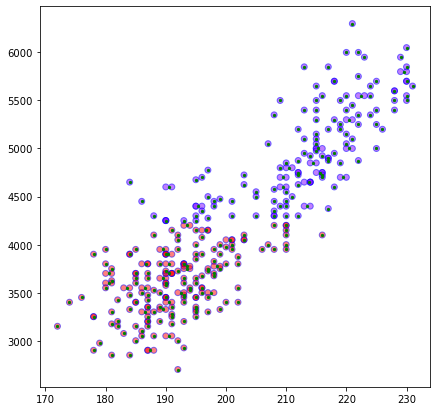

In [51]:
plt.scatter(animals["Flipper Length (mm)"], animals["Body Mass (g)"], c=test, cmap='rainbow', alpha=0.5, edgecolors='b')
centroids = brc.subcluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 5, color = 'green')

plt.show()

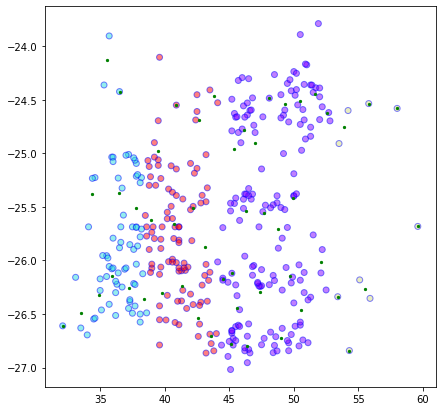

In [45]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=4)
brc.fit(animals[["Culmen Length (mm)", "Delta 13 C (o/oo)"]])
test = brc.predict(animals[["Culmen Length (mm)", "Delta 13 C (o/oo)"]])

plt.scatter(animals["Culmen Length (mm)"], animals["Delta 13 C (o/oo)"], c=test, cmap='rainbow', alpha=0.5, edgecolors='b')
centroids = brc.subcluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 5, color = 'green')

plt.show()

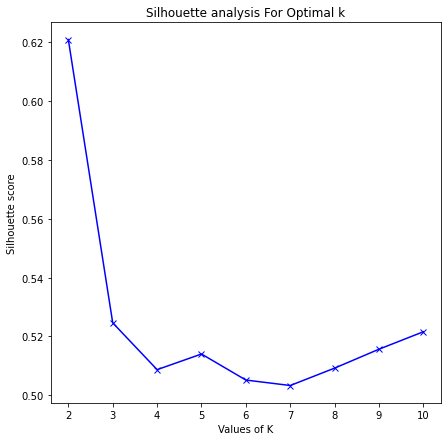

In [83]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
X = animals
for num_clusters in range(2,11):
    brc = Birch(threshold=.2,branching_factor=100, n_clusters=num_clusters)
    brc.fit(X)
    cluster_labels = brc.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters, silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

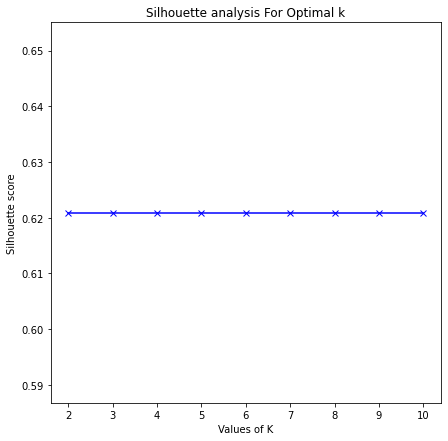

In [86]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
branches = [10,20,30,40,50,60,70,80,90,100]
silhouette_avg = []
X = animals
for num_clusters in range(2,11):
    brc = Birch(threshold=.2,branching_factor=branches[num_clusters-1], n_clusters=2)
    brc.fit(X)
    cluster_labels = brc.labels_
    #plt.plot(b, silhouette_avg,'bx-')
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters, silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

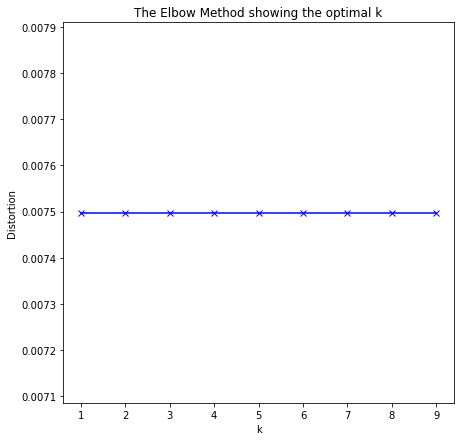

In [85]:
from scipy.spatial.distance import cdist

from sklearn.metrics import silhouette_score


distortions = []
K = range(1,10)
for k in K:
    brc = Birch(n_clusters=k).fit(animals)
    brc.fit(animals)
    distortions.append(sum(np.min(cdist(animals, brc.subcluster_centers_, 'euclidean'), axis=1)) / animals.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
#plt.ticklabel_format(style='plain',  axis='y')
plt.title('The Elbow Method showing the optimal k')
plt.show()